<a href="https://colab.research.google.com/github/nehaljain21/Probation_Tasks_GDG/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving LanguageIdentification.csv to LanguageIdentification.csv


In [2]:
import pandas as pd
df = pd.read_csv("LanguageIdentification.csv")
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


In [4]:
df.shape

(22000, 2)

In [5]:
df.isnull().sum()

,0
Text,0
language,0


In [6]:
df['language'].nunique()

22

In [7]:
df['language'].unique()

array(['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'], dtype=object)

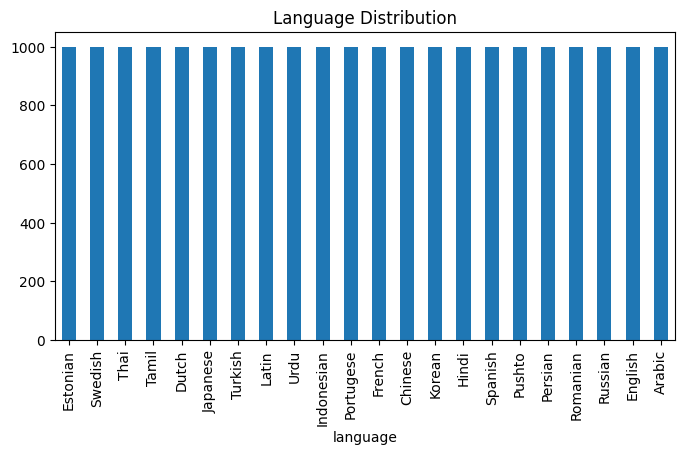

In [8]:
import matplotlib.pyplot as plt
df['language'].value_counts().plot(kind='bar', figsize=(8,4), title='Language Distribution')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
le = LabelEncoder()

In [11]:
df['label']= le.fit_transform(df['language'])

In [12]:
df.head()

,Text,language,label
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,4
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,17
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,19
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,18
4,de spons behoort tot het geslacht haliclona en...,Dutch,2


In [51]:
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1,3), max_features=5000)
x = vectorizer.fit_transform(df['Text'])
y = df['label']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [54]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [55]:
x_train = x_train.toarray().astype('float32')
x_test = x_test.toarray().astype('float32')

In [56]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=x_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train_cat.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 256)            │     1,280,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 22)             │         2,838 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,315,990 (5.02 MB)

 Trainable params: 1,315,990 (5.02 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [58]:
history = model.fit(x_train, y_train_cat,validation_data=(x_test, y_test_cat),epochs=20,batch_size=32,verbose=1,callbacks=[early_stop])

Epoch 1/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8379 - loss: 0.9343 - val_accuracy: 0.9832 - val_loss: 0.0753
Epoch 2/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9887 - loss: 0.0518 - val_accuracy: 0.9832 - val_loss: 0.0677
Epoch 3/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9940 - loss: 0.0256 - val_accuracy: 0.9845 - val_loss: 0.0665
Epoch 4/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9980 - loss: 0.0133 - val_accuracy: 0.9850 - val_loss: 0.0698
Epoch 5/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9988 - loss: 0.0058 - val_accuracy: 0.9861 - val_loss: 0.0676
Epoch 6/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9990 - loss: 0.0042 - val_accuracy: 0.9848 - val_loss: 0.0783


In [59]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [60]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [61]:
print("\n Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))


 Accuracy: 0.9845454545454545

Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       200
     Chinese       0.99      0.99      0.99       200
       Dutch       0.99      0.99      0.99       200
     English       0.83      1.00      0.90       200
    Estonian       0.98      0.99      0.98       200
      French       0.98      0.99      0.99       200
       Hindi       1.00      0.96      0.98       200
  Indonesian       1.00      0.97      0.98       200
    Japanese       1.00      0.99      0.99       200
      Korean       1.00      0.99      1.00       200
       Latin       0.98      0.94      0.96       200
     Persian       1.00      0.99      0.99       200
   Portugese       0.98      0.98      0.98       200
      Pushto       1.00      0.96      0.98       200
    Romanian       1.00      0.98      0.99       200
     Russian       0.99      0.99      0.99       200
     Spanish       0.98  

In [72]:
def detect_language(text):
    vec = vectorizer.transform([text]).toarray()
    pred = np.argmax(model.predict(vec))
    return le.inverse_transform([pred])[0]
print(detect_language("Bonjour mon ami"))
print(detect_language("नमस्ते"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
French
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Hindi
